<a href="https://colab.research.google.com/github/reddy-nithin/CS5530-PDS-InClassAssignements/blob/main/ICP6_Joins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This ICP will mainly introduce you to the different types of joins in pandas and how to use them. It will also tell you how to deal with redundancy or duplicate values in the resulting dataframes.

Learning Objectives

1.   Get acquainted with the different types of python joins in Pandas
2.   Learn how to join strings in Python pandas


Inner Join in Pandas
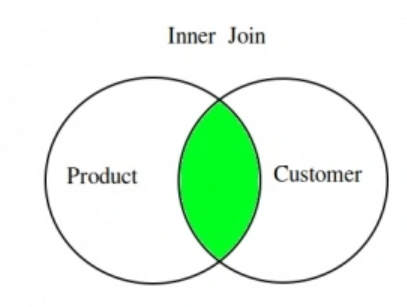


Inner join is the most common type of join you’ll be working with. It returns a dataframe with only those rows that have common characteristics.

An inner join requires each row in the two joined dataframes to have matching column values. This is similar to the intersection of two sets.
Let’s start by importing the Pandas library:

In [2]:
import pandas as pd

For this ICP, we will create two dataframes – product and customer. The product dataframe will contain product details like Product_ID, Product_name, Category, Price, and Seller_City. The customer dataframe will contain details like id, name, age, Product_ID, Purchased_Product, and City.

Our goal is to use our joining skills and generate meaningful information from the data

In [3]:


product=pd.DataFrame({
    'Product_ID':[101,102,103,104,105,106,107],
    'Product_name':['Watch','Bag','Shoes','Smartphone','Books','Oil','Laptop'],
    'Category':['Fashion','Fashion','Fashion','Electronics','Study','Grocery','Electronics'],
    'Price':[299.0,1350.50,2999.0,14999.0,145.0,110.0,79999.0],
    'Seller_City':["New York", "Los Angeles", "Chicago", "New York", "Houston", "Chicago", "Phoenix"]
})

product

,Product_ID,Product_name,Category,Price,Seller_City
0,101,Watch,Fashion,299.0,New York
1,102,Bag,Fashion,1350.5,Los Angeles
2,103,Shoes,Fashion,2999.0,Chicago
3,104,Smartphone,Electronics,14999.0,New York
4,105,Books,Study,145.0,Houston
5,106,Oil,Grocery,110.0,Chicago
6,107,Laptop,Electronics,79999.0,Phoenix


In the above code snippet, we have passed a dict in the pandas DataFrame constructor. The dictionary has key-value pairs, where keys are Python strings, and the values are iterable objects; these could be lists, tuples, json, etc.

In [4]:
customer=pd.DataFrame({
    'id':[1,2,3,4,5,6,7,8,9],
    'name':['Olivia','Aditya','Cory','Isabell','Dominic','Tyler','Samuel','Daniel','Jeremy'],
    'age':[20,25,15,10,30,65,35,18,23],
    'Product_ID':[101,0,106,0,103,104,0,0,107],
    'Purchased_Product':['Watch','NA','Oil','NA','Shoes','Smartphone','NA','NA','Laptop'],
    'City':["New York", "Los Angeles", "Chicago", "New York", "Houston", "Chicago", "Phoenix", "Los Angeles", "San Antonio"]
})
customer

,id,name,age,Product_ID,Purchased_Product,City
0,1,Olivia,20,101,Watch,New York
1,2,Aditya,25,0,NA,Los Angeles
2,3,Cory,15,106,Oil,Chicago
3,4,Isabell,10,0,NA,New York
4,5,Dominic,30,103,Shoes,Houston
5,6,Tyler,65,104,Smartphone,Chicago
6,7,Samuel,35,0,NA,Phoenix
7,8,Daniel,18,0,NA,Los Angeles
8,9,Jeremy,23,107,Laptop,San Antonio


We want to know about all the products sold online and who purchased them. Using an inner join, we can easily do this.

The merge() function

By default, the merge pandas function performs an inner join. The merge function only takes series or dataframe objects as input for merging; if we pass a different data type, it will result in a typeerror. The two dataframe / series objects are passed in the merge function with a comma as the separator.

In [5]:
pd.merge(product,customer,on='Product_ID')

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City
0,101,Watch,Fashion,299.0,New York,1,Olivia,20,Watch,New York
1,103,Shoes,Fashion,2999.0,Chicago,5,Dominic,30,Shoes,Houston
2,104,Smartphone,Electronics,14999.0,New York,6,Tyler,65,Smartphone,Chicago
3,106,Oil,Grocery,110.0,Chicago,3,Cory,15,Oil,Chicago
4,107,Laptop,Electronics,79999.0,Phoenix,9,Jeremy,23,Laptop,San Antonio


Above, I have performed inner join on the product and customer dataframes on the ‘Product_ID’ column.

But what if the column name strings are different in the two dataframes? Then, we have to mention both column names str explicitly.

‘left_on’ and ‘right_on’ are two parameters through which we can achieve this. ‘left_on’ is the name of the key in the left dataframe and ‘right_on’ in the right dataframe.

In [6]:
pd.merge(product,customer,left_on='Product_name',right_on='Purchased_Product')

,Product_ID_x,Product_name,Category,Price,Seller_City,id,name,age,Product_ID_y,Purchased_Product,City
0,101,Watch,Fashion,299.0,New York,1,Olivia,20,101,Watch,New York
1,103,Shoes,Fashion,2999.0,Chicago,5,Dominic,30,103,Shoes,Houston
2,104,Smartphone,Electronics,14999.0,New York,6,Tyler,65,104,Smartphone,Chicago
3,106,Oil,Grocery,110.0,Chicago,3,Cory,15,106,Oil,Chicago
4,107,Laptop,Electronics,79999.0,Phoenix,9,Jeremy,23,107,Laptop,San Antonio


What if we want to know about all the products the seller sells to the same city, i.e., both the seller and the customer belong to the same city.

In this case, we have to perform an inner join on both Product_ID and Seller_City of the product and Product_ID and City columns of the customer dataframe.

 We only passed single strings in the left_on or right_on arguments in the above example. We can pass an iterable object of column names to the left_on and right_on arguments, which can be a list or a tuple, as they are iterable in left_on or right_on.

Below the list items are column names, which are the names of the columns on which we want to join two dataframes.

In [7]:
pd.merge(product,customer,how='inner',left_on=['Product_ID','Seller_City'],right_on=['Product_ID','City'])

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City
0,101,Watch,Fashion,299.0,New York,1,Olivia,20,Watch,New York
1,106,Oil,Grocery,110.0,Chicago,3,Cory,15,Oil,Chicago


Full Join in Pandas
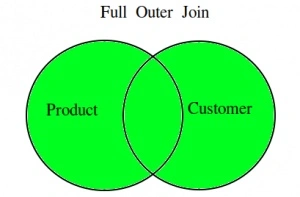

What if we have to combine both dataframes to find all the products that are not sold and all the customers who didn’t purchase anything from us.

We can use Full Join for this purpose.

Full Join, also known as Full Outer Join, returns all those records which either have a match in the left or right dataframe.

When rows in both the dataframes do not match, the resulting dataframe will have NaN for every dataframe column that lacks a matching row.

We can perform Full join by passing the how parameter as ‘outer’ to the merge() function, which takes input python strings as arguments:

In [8]:
pd.merge(product,customer,on='Product_ID',how='outer')

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City
0,0,NaN,NaN,NaN,NaN,2.0,Aditya,25.0,NA,Los Angeles
1,0,NaN,NaN,NaN,NaN,4.0,Isabell,10.0,NA,New York
2,0,NaN,NaN,NaN,NaN,7.0,Samuel,35.0,NA,Phoenix
3,0,NaN,NaN,NaN,NaN,8.0,Daniel,18.0,NA,Los Angeles
4,101,Watch,Fashion,299.0,New York,1.0,Olivia,20.0,Watch,New York
5,102,Bag,Fashion,1350.5,Los Angeles,NaN,NaN,NaN,NaN,NaN
6,103,Shoes,Fashion,2999.0,Chicago,5.0,Dominic,30.0,Shoes,Houston
7,104,Smartphone,Electronics,14999.0,New York,6.0,Tyler,65.0,Smartphone,Chicago
8,105,Books,Study,145.0,Houston,NaN,NaN,NaN,NaN,NaN
9,106,Oil,Grocery,110.0,Chicago,3.0,Cory,15.0,Oil,Chicago


Did you notice what happened here? All the non-matching rows of both the dataframes have NaN values for the columns of other dataframes. But wait – we still don’t know which row belongs to which dataframe.

For this, Pandas provides us with a fantastic solution. By mentioning the indicator argument as True in the function, a new column of name _merge will be created in the resulting dataframe, which will mention which row belongs to which dataframe.

In [9]:
pd.merge(product,customer,on='Product_ID',how='outer',indicator=True)

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City,_merge
0,0,NaN,NaN,NaN,NaN,2.0,Aditya,25.0,NA,Los Angeles,right_only
1,0,NaN,NaN,NaN,NaN,4.0,Isabell,10.0,NA,New York,right_only
2,0,NaN,NaN,NaN,NaN,7.0,Samuel,35.0,NA,Phoenix,right_only
3,0,NaN,NaN,NaN,NaN,8.0,Daniel,18.0,NA,Los Angeles,right_only
4,101,Watch,Fashion,299.0,New York,1.0,Olivia,20.0,Watch,New York,both
5,102,Bag,Fashion,1350.5,Los Angeles,NaN,NaN,NaN,NaN,NaN,left_only
6,103,Shoes,Fashion,2999.0,Chicago,5.0,Dominic,30.0,Shoes,Houston,both
7,104,Smartphone,Electronics,14999.0,New York,6.0,Tyler,65.0,Smartphone,Chicago,both
8,105,Books,Study,145.0,Houston,NaN,NaN,NaN,NaN,NaN,left_only
9,106,Oil,Grocery,110.0,Chicago,3.0,Cory,15.0,Oil,Chicago,both


Left Join in Pandas

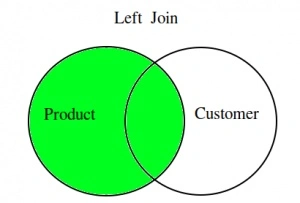

what if we want information about only those customers who bought something from us. We can use the Left Join concept here.

Left join, also known as Left Outer Join, returns a dataframe containing all the rows of the left dataframe.

All the non-matching rows of the left dataframe contain NaN for the columns in the right dataframe. It is simply an inner join plus all the non-matching rows of the left dataframe filled with NaN for columns of the right dataframe.

Performing a left join is actually quite similar to a full join. Just change the how argument to a different str that is ‘left’:

In [10]:
pd.merge(product,customer,on='Product_ID',how='left')

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City
0,101,Watch,Fashion,299.0,New York,1.0,Olivia,20.0,Watch,New York
1,102,Bag,Fashion,1350.5,Los Angeles,NaN,NaN,NaN,NaN,NaN
2,103,Shoes,Fashion,2999.0,Chicago,5.0,Dominic,30.0,Shoes,Houston
3,104,Smartphone,Electronics,14999.0,New York,6.0,Tyler,65.0,Smartphone,Chicago
4,105,Books,Study,145.0,Houston,NaN,NaN,NaN,NaN,NaN
5,106,Oil,Grocery,110.0,Chicago,3.0,Cory,15.0,Oil,Chicago
6,107,Laptop,Electronics,79999.0,Phoenix,9.0,Jeremy,23.0,Laptop,San Antonio


# Nithin Songala 16344141


## Performing Right Join


In [13]:
pd.merge(product,customer,on='Product_ID',how='right')

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City
0,101,Watch,Fashion,299.0,New York,1,Olivia,20,Watch,New York
1,0,NaN,NaN,NaN,NaN,2,Aditya,25,NA,Los Angeles
2,106,Oil,Grocery,110.0,Chicago,3,Cory,15,Oil,Chicago
3,0,NaN,NaN,NaN,NaN,4,Isabell,10,NA,New York
4,103,Shoes,Fashion,2999.0,Chicago,5,Dominic,30,Shoes,Houston
5,104,Smartphone,Electronics,14999.0,New York,6,Tyler,65,Smartphone,Chicago
6,0,NaN,NaN,NaN,NaN,7,Samuel,35,NA,Phoenix
7,0,NaN,NaN,NaN,NaN,8,Daniel,18,NA,Los Angeles
8,107,Laptop,Electronics,79999.0,Phoenix,9,Jeremy,23,Laptop,San Antonio
